# River and well Model

![River Base Concept Model](river_and_wells.svg)

# Example description
### Spatial configuration
There is two simulated aquifer which are separated by an aquitard. The model grid consists of 15 rows, 10 columns, and 3 layers.  Uniform grid spacing with a row and column width of 100.0 meters. The top layer is positioned at an elevation of 15.0 meters, while the bottom layers are situated at elevations of -5.0, -10.0, and -15.0 meters, respectively.
### Temporal discretization
The model is designed for a simulation period of 10 days, divided into 120 time steps per stress period, with a time step multiplier of 1.0. The simulation is repeated for a total of 3 periods. The model operates in days as time units and meters as length units.
### Layer Hydraulic properties 
Initial hydraulic conductivity values for the three layers are set at 0.5, 0.000006, and 0.5, respectively.
The vertical anisotropy ratios for the layers are specified as 0.1, 0.2, and 0.3, indicating differences in hydraulic conductivity in the vertical direction.
### Storage properties 
The specific yield is set at 0.2, representing the volumetric ratio of water that drains under the influence of gravity.The specific storage is specified as 0.000001, representing the compressibility of the aquifer.
### Boundary Conditions 
The model starts with an initial hydraulic head of 10.0 meters across the entire domain. 
Two constant head boundaries are established at specific locations: one at the intersection of the first layer, first row, and first column and another at the intersection of the last layer, last row, and last column, each set at a constant head of 10.0 meters.
### River Boundary specifications 
rivlay: Specifies the layer number for each river cell. In this case, all river cells are situated in Layer 0, denoting their vertical position within the aquifer system.  
rivrow and rivcol: Arrays indicating the horizontal positions of the river cells in terms of rows and columns within the model grid.  
rivstg: Represents the stage or water level of each river cell. The values gradually vary between 13 and 14 across the river cells.  
rivbot: Defines the elevation of the river bottom for each corresponding river cell, showing a variation between elevations of 7 and 10.  
rivcnd: Indicates the conductance values associated with the river cells. In this case, a uniform conductance value of 0.05 is assigned to all river cells.  

# Start setting up the model 

### Magic commands - auto reload of the model each time 

In [92]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
%autoreload 2

### Import from pymf6tools the functions to run, get and visualize simulation results

In [94]:
from pathlib import Path

from pymf6_tools.base_model import make_model_data
from pymf6_tools.make_model import make_input, run_simulation
from pymf6_tools.plotting import show_heads, show_well_head, show_bcs

In [4]:
import numpy as np 
from pymf6.mf6 import MF6
import pandas as pd 
from functools import partial 
from pymf6_tools.make_model import run_simulation, get_simulation


In [96]:
from pymf6_tools.plotting import show_heads, show_well_head, show_concentration, show_bcs, show_bot_elevations, show_river_stages, contour_bot_elevations, plot_spec_discharge

## Set model path and name 

In [6]:
model_path = 'models/riverbase'
model_name = "riverbase"

## Run simulation - Uncontrolled 

In [105]:
run_simulation(model_path)

## Visualization of Input and Output - e.g. Boundary conditions and Heads 

### Boundary Conditions 
Note that you should change the "bc_names" according to the boundary conditions present in the simulation.  
<span style="color:blue">'chd'</span> Constant-head boundary  
<span style="color:blue">'riv-1'</span> River boundary

### Inspect visualization tools

In [106]:
show_bcs?

Signature:
show_bcs(
    model_path,
    name,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\users\lucialabarca\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\plotting.py
Type:      function

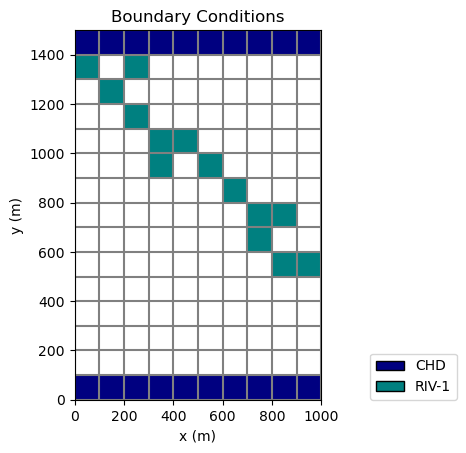

In [109]:
show_bcs(model_path, model_name, bc_names=('chd','riv-1'))

### Check results - Plot model 

### Bottom elevation of the layers - Interactive graph
max_top: maximum elevation of the layer selected  
max_botm: maximum depth of the layer selected  
layer: choose layer of the model 

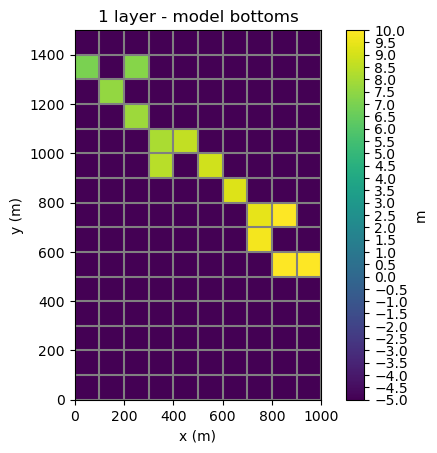

In [101]:
show_bot_elevations(model_path, model_name, max_top=15., max_botm=-15., layer=1)

### Specific Discharge - Interactive graph (layer and time)
Specify the layer and time of the simulation to be visualized.

In [102]:
plot_spec_discharge(model_path, model_name, layer=2, times = 300)

ValueError: datafile error: file is empty: C:\Users\lucialabarca\pymf6-validation\src\notebooks\models\riverbase\gwf_riverbase.bud

In [ ]:
plot_spec_discharge(model_path, model_name, layer=1, times = 300)

### Bottom elevations with Countour lines - Interactive layer 
Specify the layer to be visualized.

In [ ]:
contour_bot_elevations(model_path, model_name, max_top= -15, max_botm=15, layer=1)

### River Stages - Interactive layer and time period 
Specify the layer and the time period to be plotted. 

In [ ]:
show_river_stages(model_path, model_name, layer=1, time_period=3)

### Groundwater level 

In [ ]:
show_heads(model_path, model_name, show_wells=False)

### Show well head

In [ ]:
show_well_head((0, 4, 4), model_path, model_name, times=[1], y_start=0, y_end=20)

### Controlled case 

The primary objective is to the extract the maximum amount of groundwater for drinking water supply while maintaining system stability through continued regulation. To ensure sustainable groundwater management and protect the integrity of the connected river ecosystem, we aim to dynamically control the flow model. The pumping rates of the wells are continuously regulated based on threshold values for both groundwater levels and river water levels. This approach allows for real-time adjustment of extraction rates to prevent overexploitation and ecological degradation. 

### Using pymf6 to dynamically access the model 

In [ ]:
mf6 = MF6(model_path)

### Inspect the parameters by importing the model results 

In [ ]:
mf6.models.keys()

In [ ]:
gwf_models = mf6.models['gwf6']

In [ ]:
gwf_models.keys()

In [ ]:
gwf = gwf_models['riverbase']

### Inspect the packages 

In [ ]:
gwf.packages

### Controlled Well Head 

In [ ]:
show_well_head((0, 4, 4), model_path, model_name, times=[1], y_start=0, y_end=20)